In [21]:
import pandas as pd
import numpy as np
from pandas import option_context

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

In [22]:
df = pd.read_csv('datasets/filtered.csv')

In [23]:
text = " ".join(df.review)
text = text.split()
freq_word = pd.Series(text).value_counts()

In [27]:
top_freq = list(freq_word.sort_values(ascending=False)[:200].to_dict().keys())

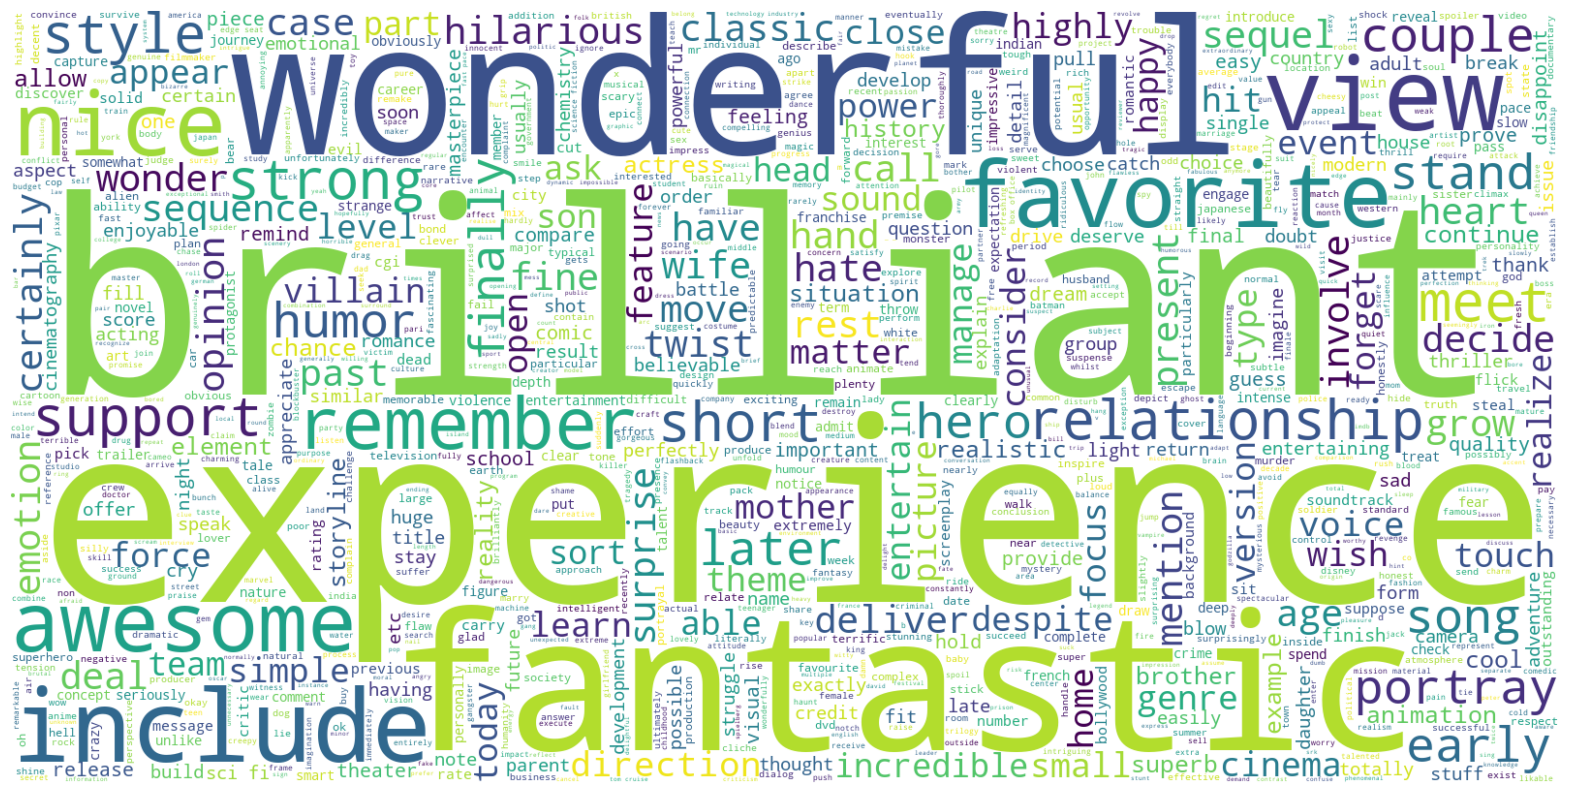

In [32]:
plt.figure(figsize = (20,20)) # Positive Review Text
plt.axis('off')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, stopwords=top_freq, background_color='white').generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')
#plt.savefig('images/pos_wc.jpg')

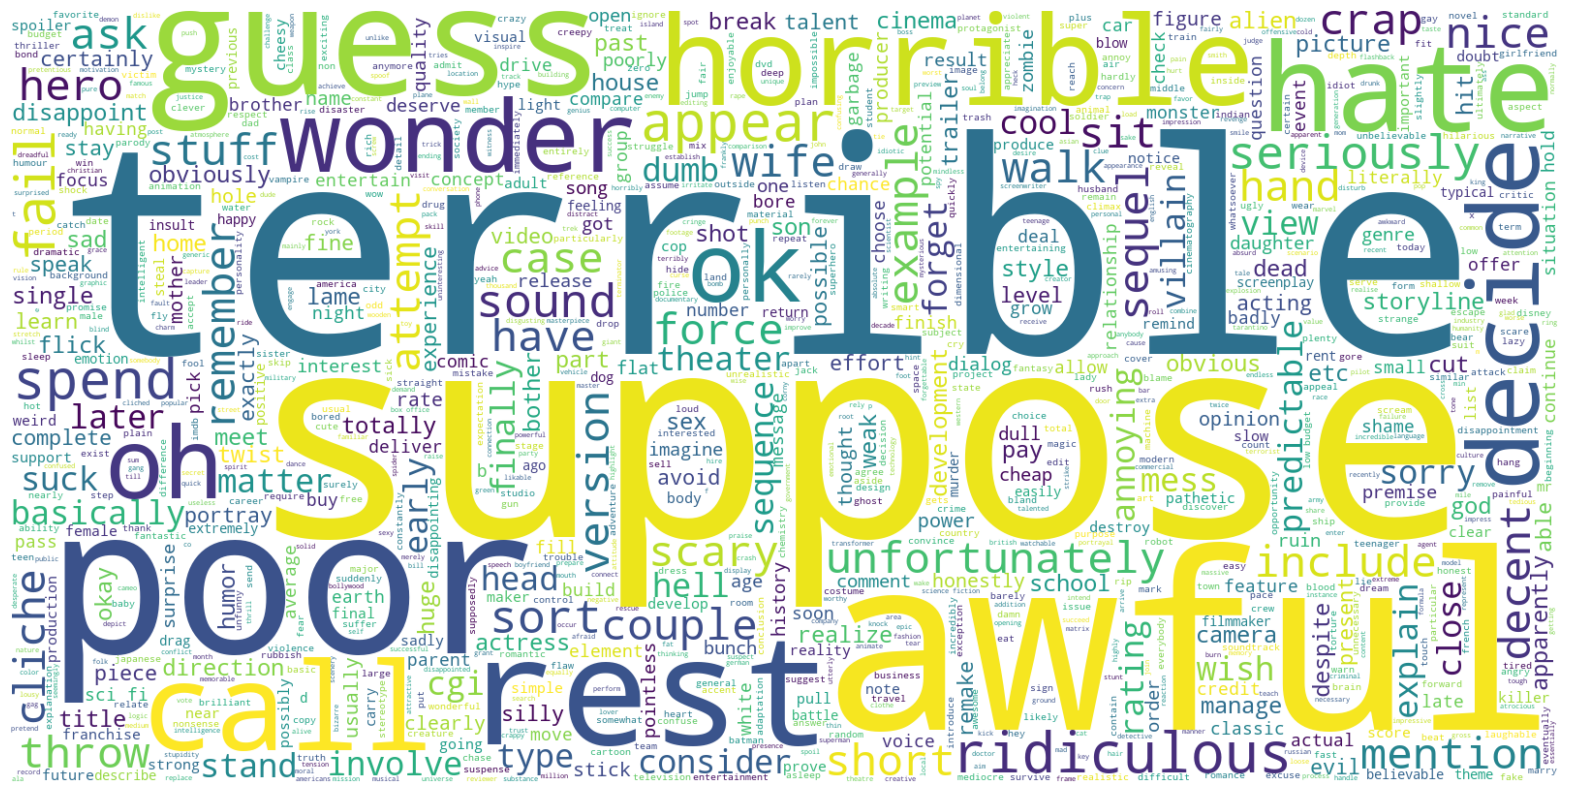

In [33]:
plt.figure(figsize = (20,20)) # Positive Review Text
plt.axis('off')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, stopwords=top_freq, background_color='white').generate(" ".join(df[(df.sentiment == 0)].review))
plt.imshow(wc , interpolation = 'bilinear')
#plt.savefig('images/neg_wc.jpg')

In [34]:
review_type = ['Good', 'Bad']
review_colour = ['#2492b6','#2492b6']

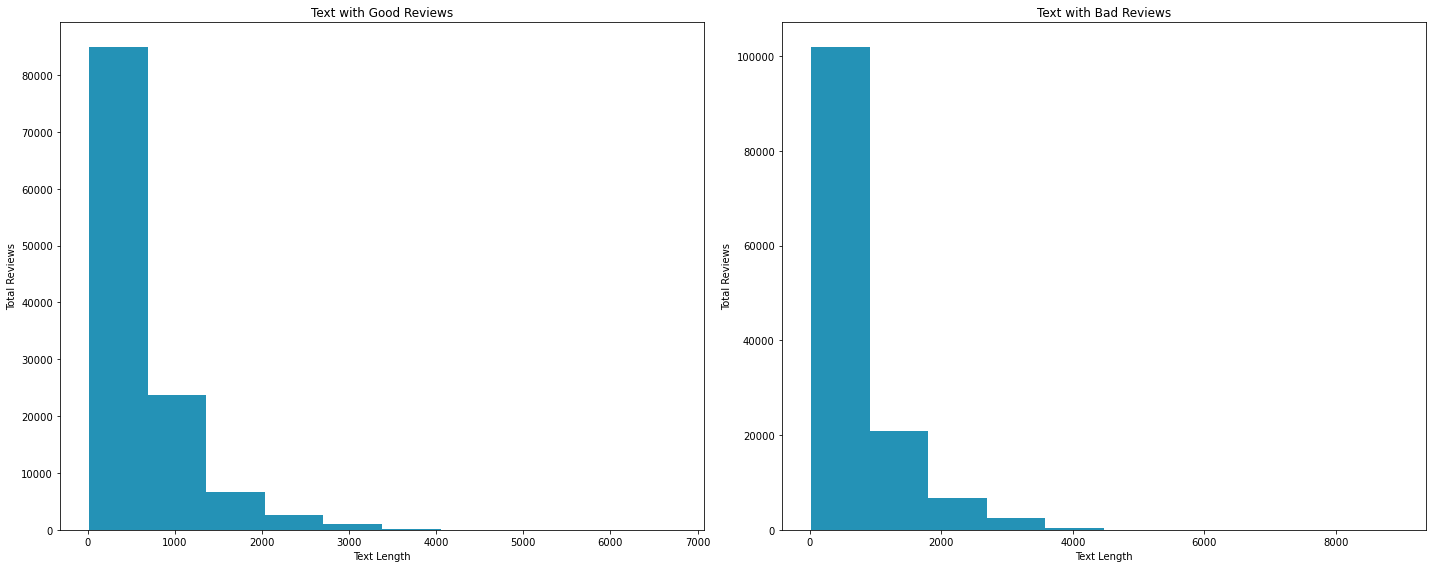

In [35]:
fig, axs =plt.subplots(1,2,figsize=(20,8))
for p in range(0,len(axs)):
    text_len=df[df['sentiment']==p]['review'].str.len()
    axs[p].hist(text_len,color=review_colour[p])
    axs[p].set_title(f'Text with {review_type[p]} Reviews')
    axs[p].set_xlabel('Text Length')
    axs[p].set_ylabel('Total Reviews')

plt.tight_layout()
plt.show()

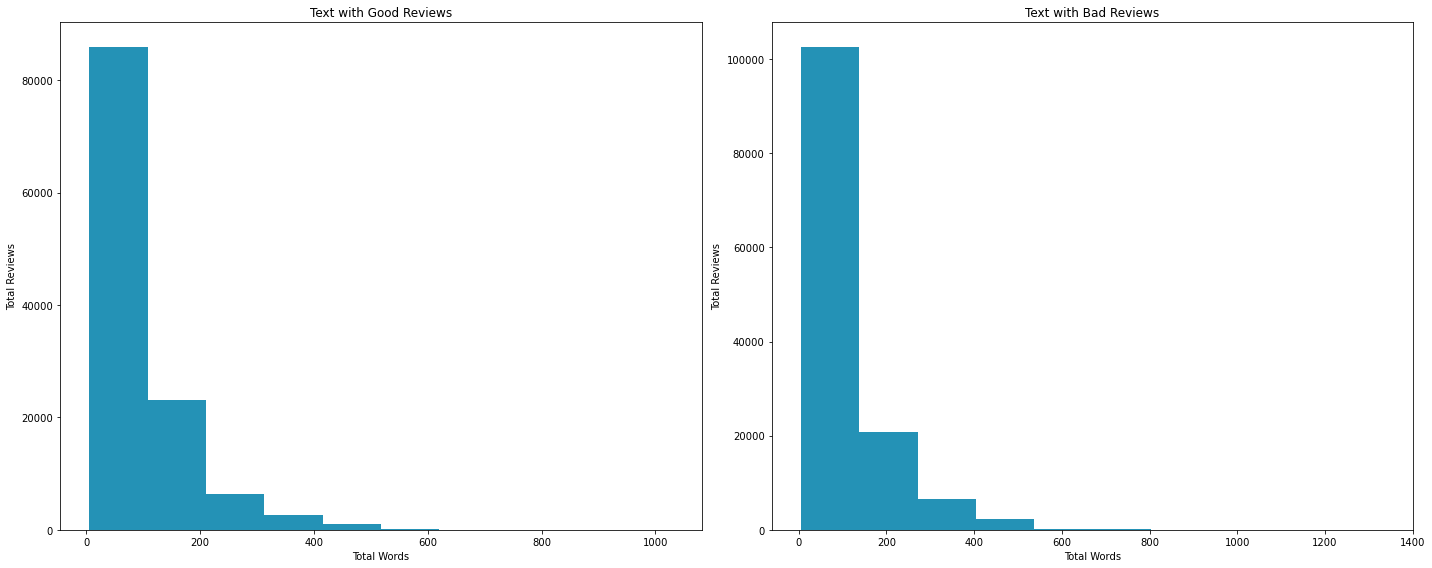

In [36]:
fig, axs =plt.subplots(1,2,figsize=(20,8))
for p in range(0,len(axs)):
    text_len=df[df['sentiment']==p]['review'].str.split().map(lambda x: len(x))
    axs[p].hist(text_len,color=review_colour[p])
    axs[p].set_title(f'Text with {review_type[p]} Reviews')
    axs[p].set_xlabel('Total Words')
    axs[p].set_ylabel('Total Reviews')

plt.tight_layout()
plt.show()

In [37]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    most_common = words_freq[:n]
    most_common = dict(most_common)
    df_most_common = pd.DataFrame([most_common]).T.reset_index()
    df_most_common.columns = ['words','count']
    return df_most_common

In [38]:
df_pos_bi = get_top_text_ngrams(df[df.sentiment == 1].review, 20, 2)

In [39]:
df_neg_bi = get_top_text_ngrams(df[df.sentiment == 0].review, 20, 2)

In [40]:
df_bi = get_top_text_ngrams(df.review, 20, 2)

In [41]:
df_pos_tri = get_top_text_ngrams(df[df.sentiment == 1].review, 20, 3)

In [42]:
df_neg_tri = get_top_text_ngrams(df[df.sentiment == 0].review, 20, 3)

In [43]:
df_tri = get_top_text_ngrams(df.review, 20, 3)

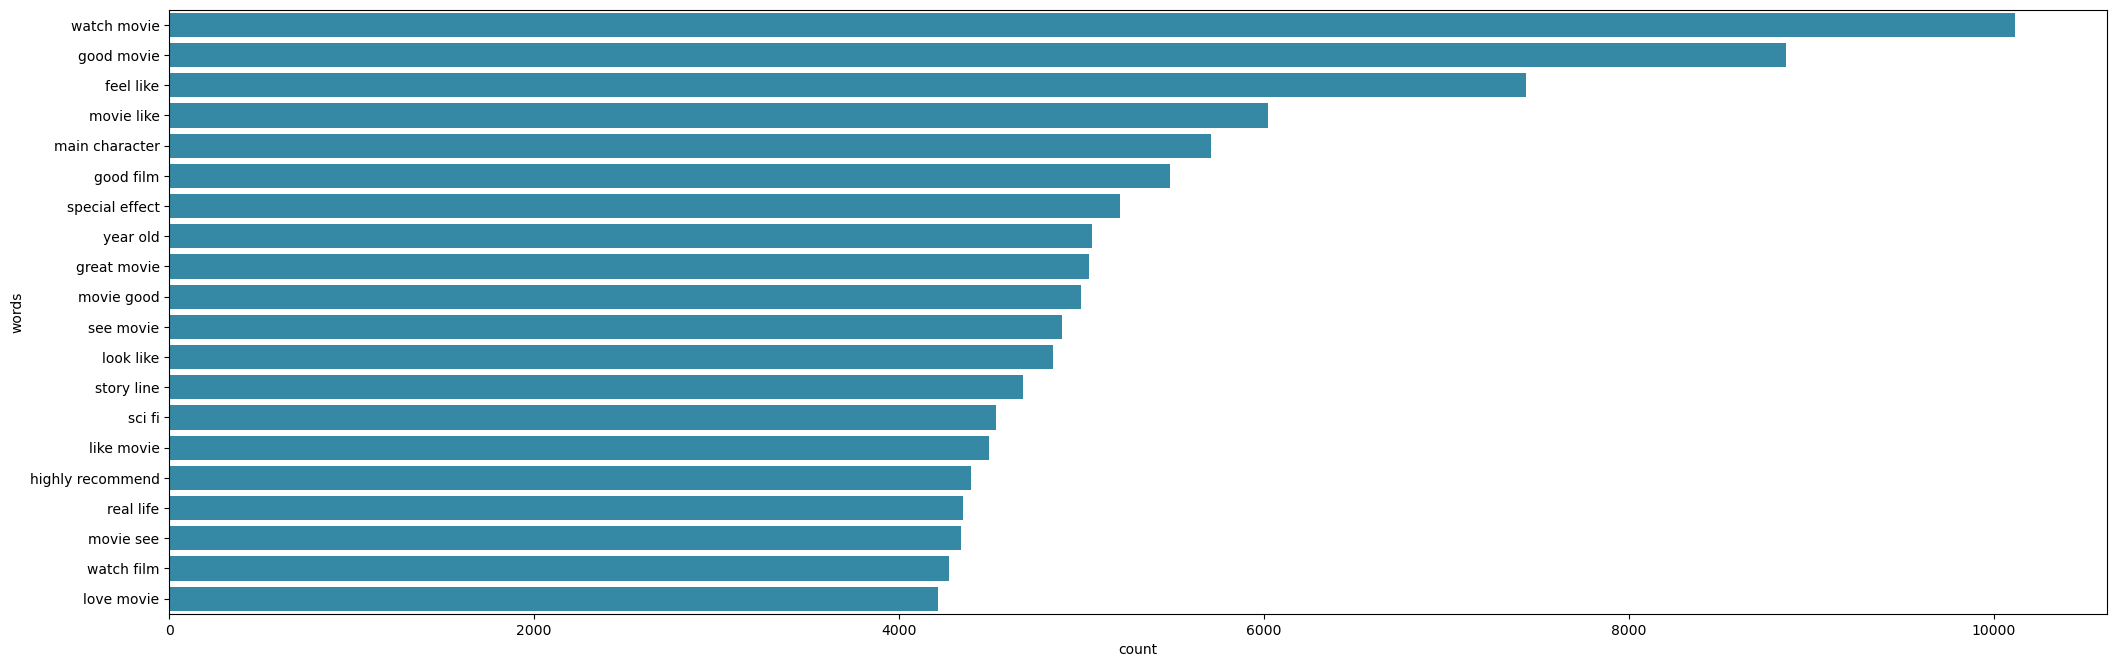

In [44]:
plt.figure(figsize=(25,8), dpi=100)
sns.barplot(x='count', y='words', data=df_pos_bi, orient = 'h', palette=['#2492b6'])
#plt.savefig('images/pos_bi.jpg')

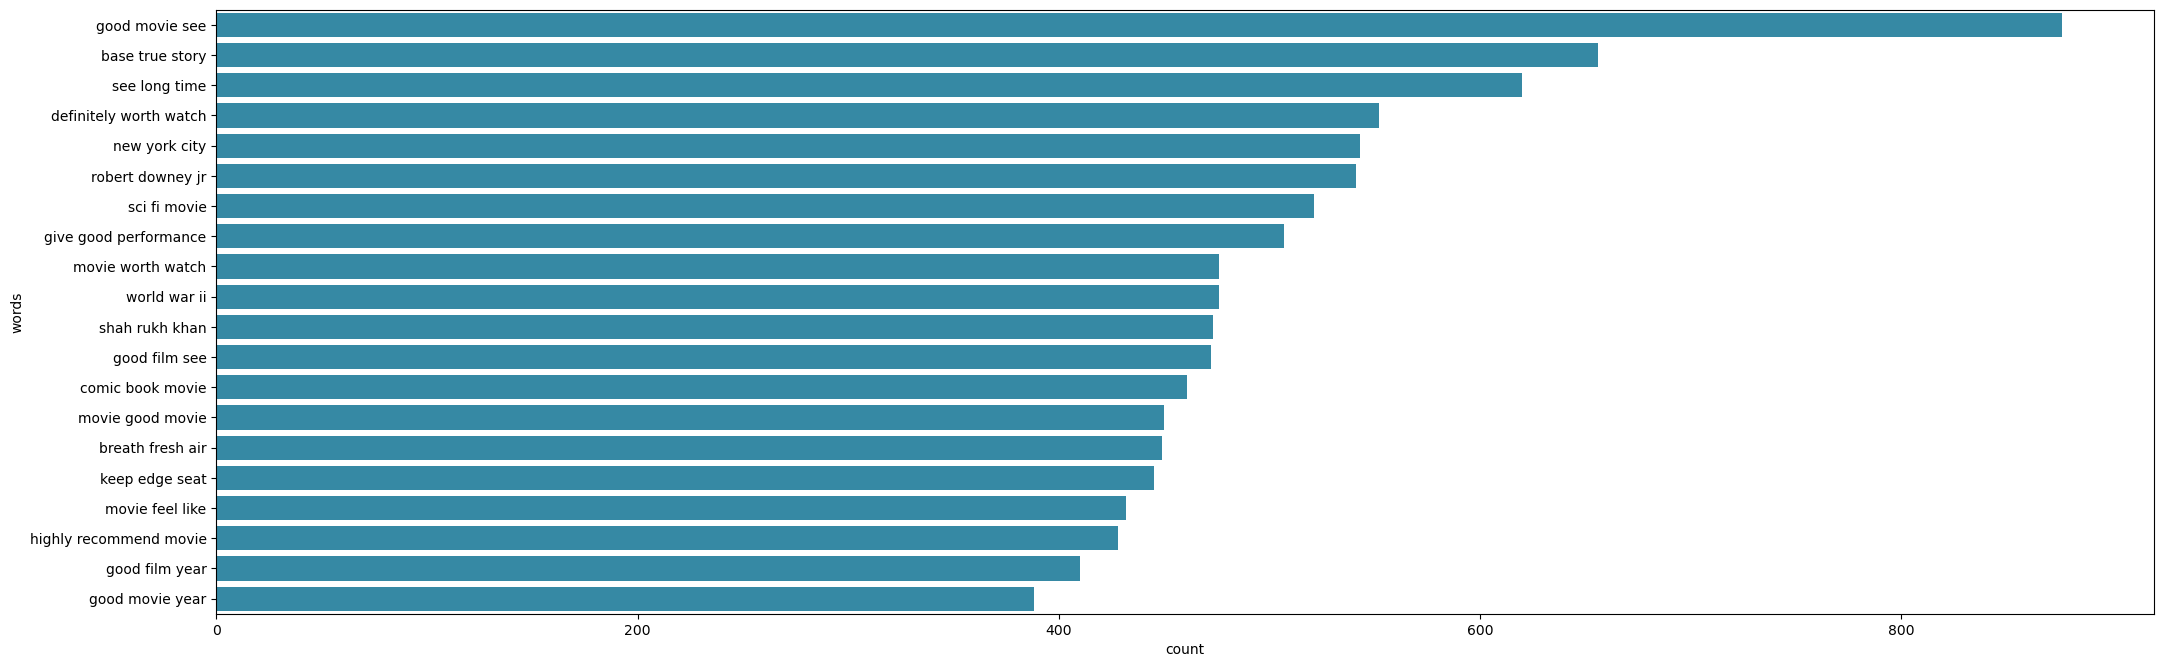

In [45]:
plt.figure(figsize=(25,8), dpi=100)
sns.barplot(x='count', y='words', data=df_pos_tri, orient = 'h', palette=['#2492b6'])

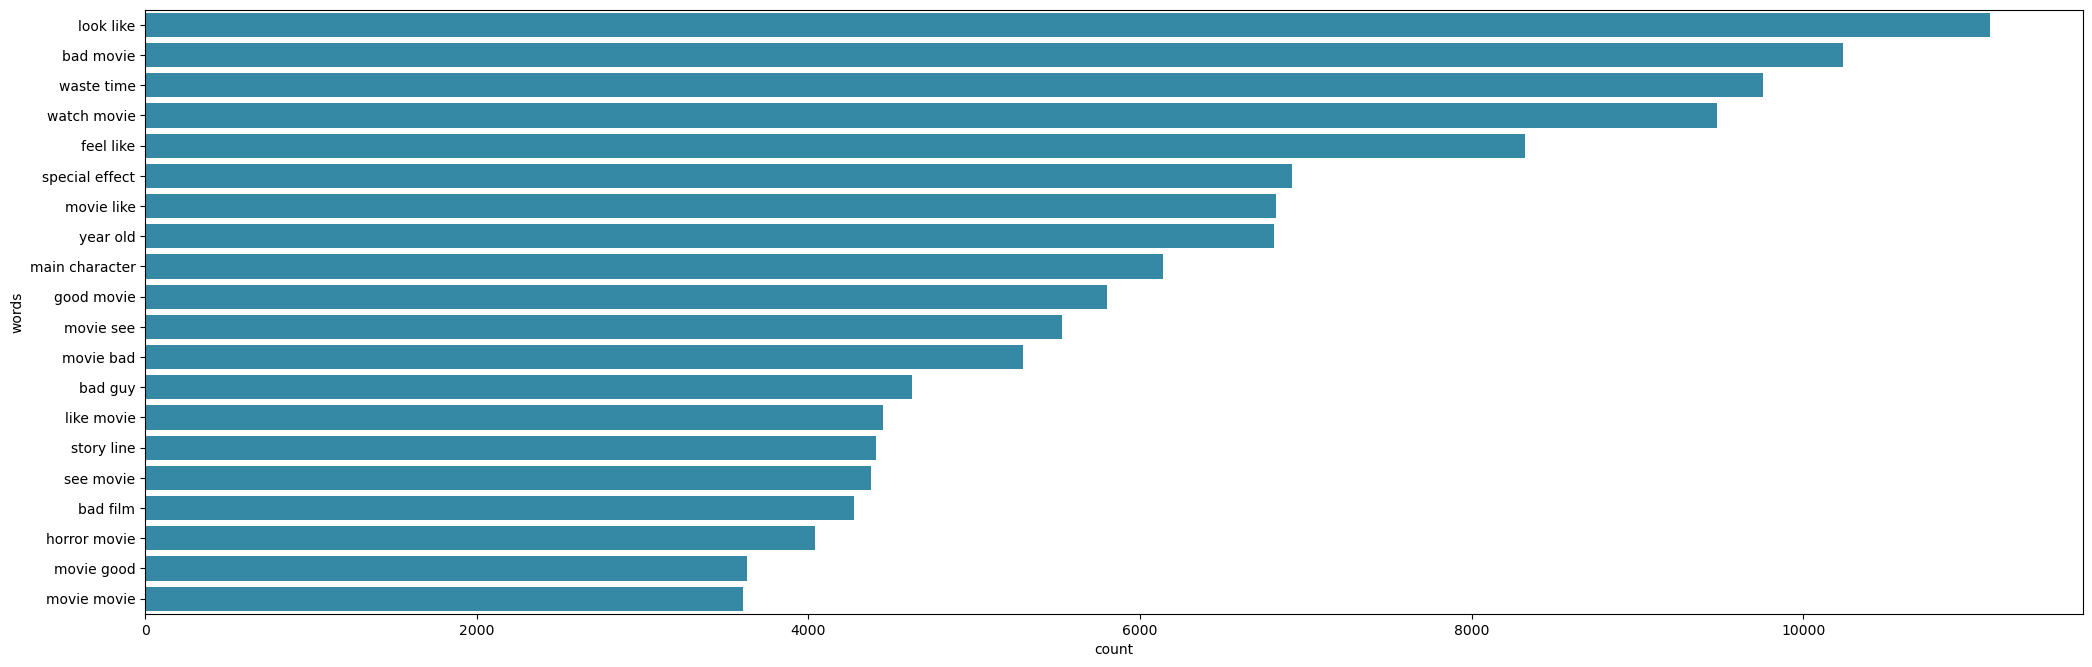

In [46]:
plt.figure(figsize=(25,8), dpi=100)
sns.barplot(x='count', y='words', data=df_neg_bi, orient = 'h', palette=['#2492b6'])
#plt.savefig('images/neg_bi.jpg')

<AxesSubplot:xlabel='count', ylabel='words'>

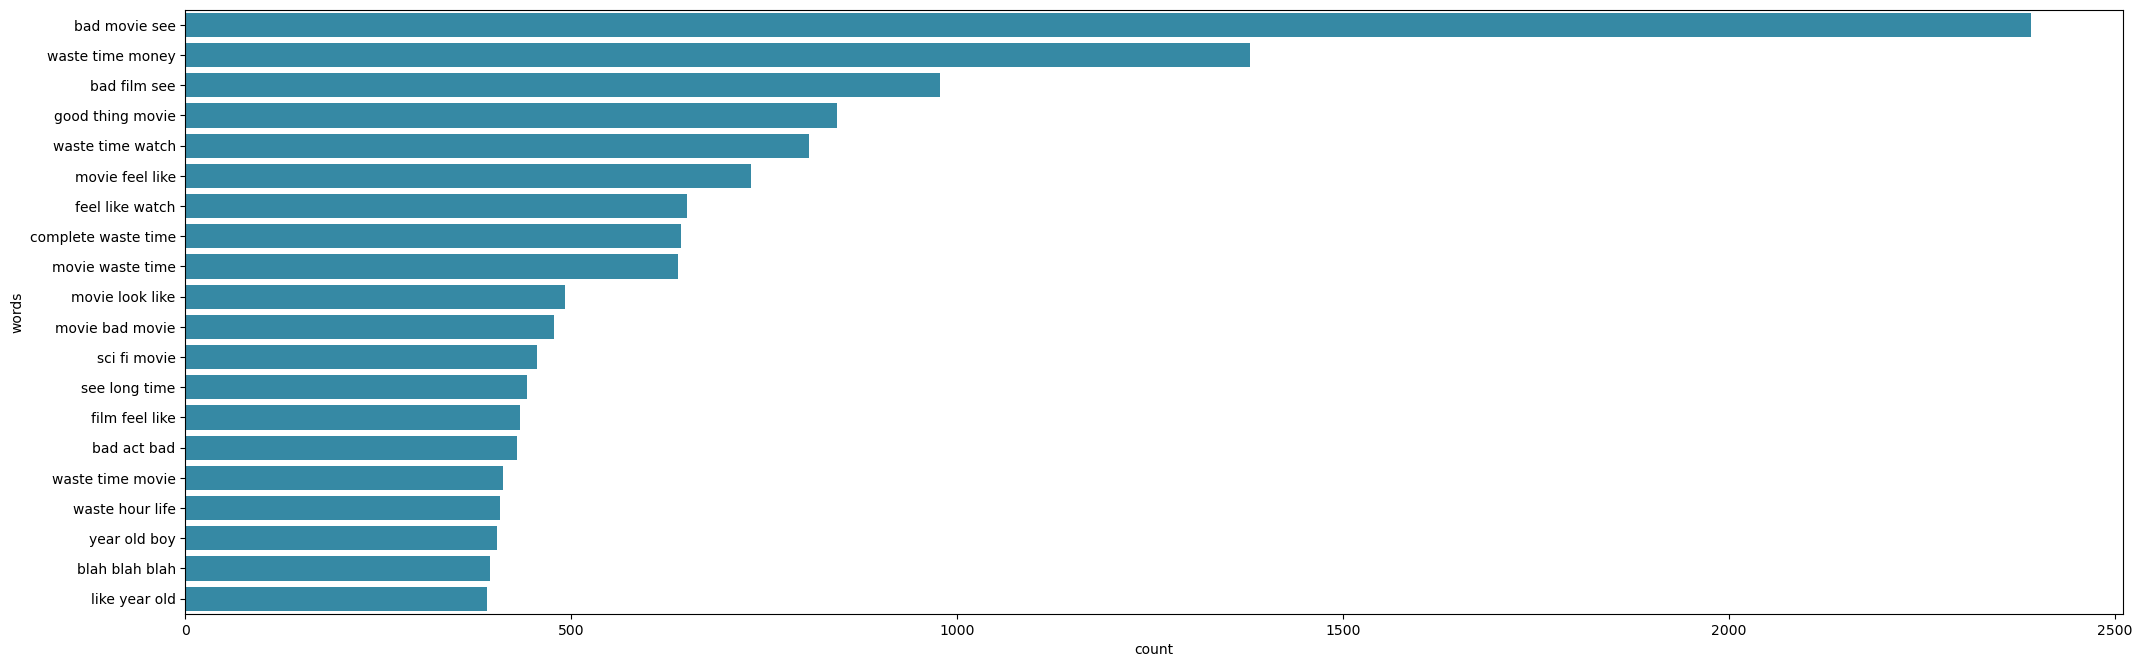

In [181]:
plt.figure(figsize=(25,8), dpi=100)
sns.barplot(x='count', y='words', data=df_neg_tri, orient = 'h', palette=['#2492b6'])